#### Nama : Angello Khara Sitanggang
#### NPM  : 220711833
#### Nama : Emanuel Enrico Anindya Wibawa
#### NPM  : 220711890
#### Kelompok SB : Transformer
#### Arsitektur : MobileNet


In [2]:
#Install tensorflow packag

#Import library
import os
import numpy as np

#Import library tensorflow dan modul keras yang diperlukan
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten



In [3]:
count = 0 
dirs = os.listdir(r'train_data')
print('List of Classes: ', dirs)
for dir in dirs:
    files = list(os.listdir(r'train_data/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

List of Classes:  ['Busuk', 'Matang', 'Mentah']
Busuk Folder has 360 Images
Matang Folder has 360 Images
Mentah Folder has 360 Images
Images Folder has 1080 Images


In [4]:
# Parameter
base_dir = r'train_data' #direktori folder dataset
img_size = 224 
batch = 10 
validation_split = 0.1 

- Memasukkan parameter yang telah di definisikan tadi untuk membuat dataset dari gambar di direktori


In [5]:
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir, 
    seed=123, 
    image_size=(img_size, img_size), 
    batch_size=batch, 
)

Found 1080 files belonging to 3 classes.


In [6]:

class_names = dataset.class_names
print("Class Names:", class_names)

Class Names: ['Busuk', 'Matang', 'Mentah']


In [7]:

total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

Total Images: 108
Train Images: 98
Validation Images: 10


In [8]:
train_ds = dataset.take(train_count) 
val_ds = dataset.skip(train_count) #mengambil data validasi

validation_split = 0.1 
train_dataset = dataset.take(train_count) 
val_dataset = dataset.skip(train_count) 
val_dataset = dataset.take(val_count) 


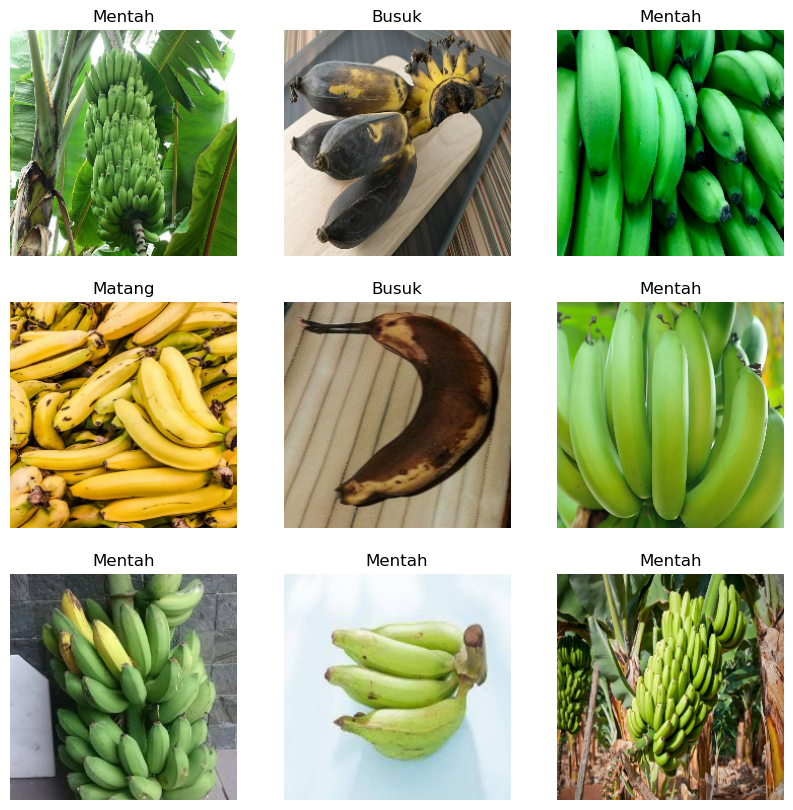

In [9]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10)) 


for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1) 
        plt.imshow(images[i].numpy().astype('uint8')) 
        plt.title(class_names[labels[i]]) 
        plt.axis('off') 

In [10]:
import numpy as np

for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)  


(10, 224, 224, 3)


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


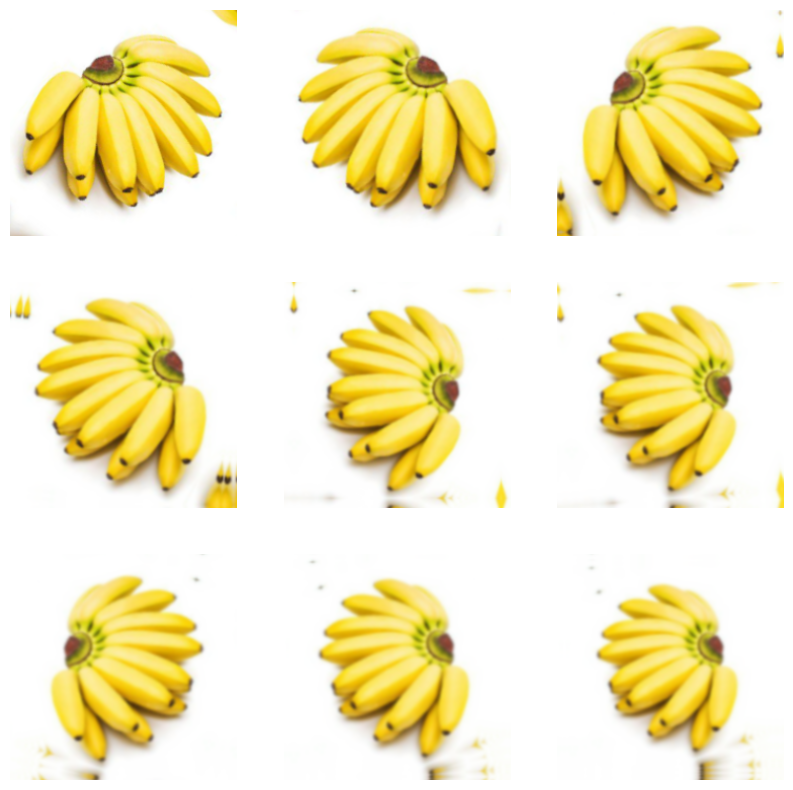

In [38]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

i = 0
plt.figure(figsize=(10,10))
#Lihat data setelah di augmentasi
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [39]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, Rescaling, BatchNormalization

model = Sequential([
    data_augmentation,
    Rescaling(1./255, input_shape=(img_size, img_size, 3)),

    # Block 1 (Depthwise Separable Convolutions)
    SeparableConv2D(32, (3, 3), activation='relu', padding='same', strides=2),  # Reducing spatial dimensions early
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 2
    SeparableConv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 3
    SeparableConv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 4
    SeparableConv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Block 5
    SeparableConv2D(512, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Global Average Pooling (instead of Flatten)
    GlobalAveragePooling2D(),

    # Fully Connected Layers
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Change this to sparse_categorical_crossentropy
              metrics=['accuracy'])

 


model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_5              │ (None, 112, 112, 32)   │           155 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_6              │ (None, 56, 56, 64)     │         2,400 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_7              │ (None, 28, 28, 128)    │         8,896 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_8              │ (None, 14, 14, 256)    │        34,176 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ separable_conv2d_9              │ (None, 7, 7, 512)      │       133,888 │
│ (SeparableConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 711,870 (2.72 MB)

 Trainable params: 709,886 (2.71 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [40]:
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=10,
    min_lr=0.00001,
    cooldown=2
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=15,
    mode='max',
    restore_best_weights=True,
    min_delta=0.001
)


y_train = []
for images, labels in train_ds:
    y_train.extend(labels.numpy())

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


history = model.fit(
    train_ds,
    epochs=60,
    validation_data=val_ds,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict
)

Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 65ms/step - accuracy: 0.6941 - loss: 0.7350 - val_accuracy: 0.4000 - val_loss: 1.0973 - learning_rate: 1.0000e-04
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.8822 - loss: 0.3466 - val_accuracy: 0.3200 - val_loss: 1.0977 - learning_rate: 1.0000e-04
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9176 - loss: 0.2387 - val_accuracy: 0.3200 - val_loss: 1.0989 - learning_rate: 1.0000e-04
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9212 - loss: 0.2205 - val_accuracy: 0.3200 - val_loss: 1.0842 - learning_rate: 1.0000e-04
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9048 - loss: 0.2116 - val_accuracy: 0.7600 - val_loss: 0.9379 - learning_rate: 1.0000e-04
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.9450 - loss: 0.1611 - val_accuracy: 0.9400 - val_loss: 0.4643 - learning_rate: 1.0000e-04
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9455

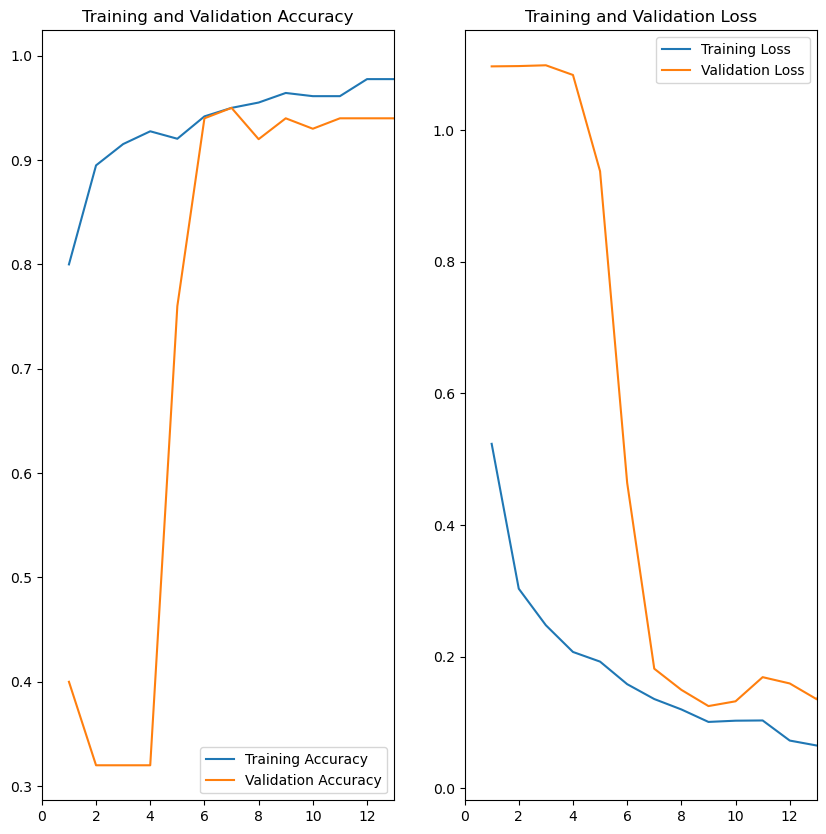

In [41]:

ephocs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10)) 
plt.subplot(1, 2, 1) 
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy') 
plt.legend(loc='lower right')
plt.xlim(0, 13) 
plt.title('Training and Validation Accuracy') 


plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

In [42]:
# Save the model in .keras format
model.save('MOBILENET.h5')


In [43]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image


model = load_model(r'MOBILENET.h5')  
class_names = ['Busuk', 'Matang', 'Mentah']

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:

        input_image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array, 0) 


        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        class_idx = np.argmax(result)
        confidence = np.max(result) * 100

        print(f"Prediksi: {class_names[class_idx]}")
        print(f"Confidence: {confidence:.2f}%")

        input_image = Image.open(image_path)
        input_image.save(save_path)

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"
result = classify_images(r'Prediksi\Matang\matang (8).jpg', save_path='matang.jpg')
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Prediksi: Matang
Confidence: 57.15%
Prediksi: Matang dengan confidence 57.15%. Gambar asli disimpan di matang.jpg.


Found 120 files belonging to 3 classes.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


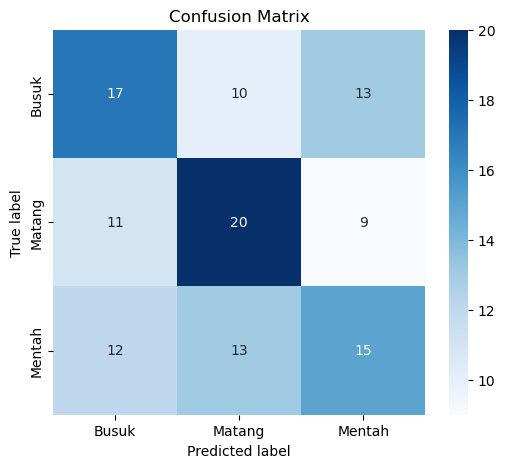

Confusion Matrix:
 [[17 10 13]
 [11 20  9]
 [12 13 15]]
Accuracy: 0.43333333333333335
Precision: [0.425      0.46511628 0.40540541]
Recall: [0.425 0.5   0.375]
F1 Score: [0.425      0.48192771 0.38961039]


In [53]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(224, 224)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy()) 
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)


f1_score = 2 * (precision * recall) / (precision + recall)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Busuk', 'Matang', 'Mentah'], yticklabels=['Busuk', 'Matang', 'Mentah'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())

Found 120 files belonging to 3 classes.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


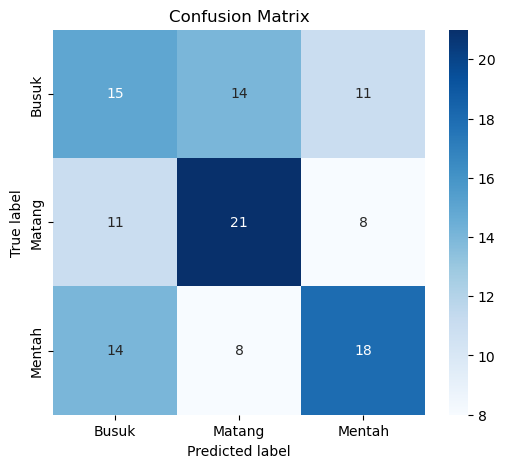

Confusion Matrix:
 [[15 14 11]
 [11 21  8]
 [14  8 18]]
Accuracy: 0.45
Precision: [0.375      0.48837209 0.48648649]
Recall: [0.375 0.525 0.45 ]
F1 Score: [0.375      0.5060241  0.46753247]


In [88]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(224, 224)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy()) 
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)


f1_score = 2 * (precision * recall) / (precision + recall)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Busuk', 'Matang', 'Mentah'], yticklabels=['Busuk', 'Matang', 'Mentah'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())

Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


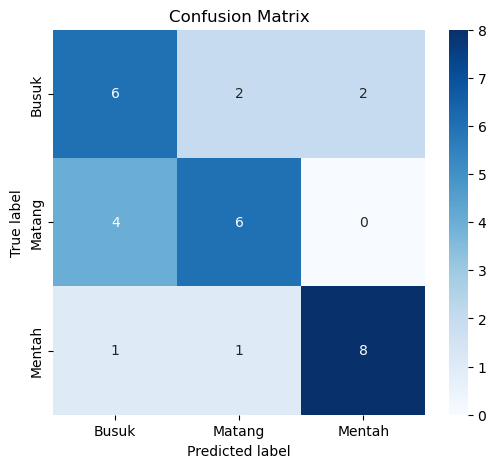

Confusion Matrix:
 [[6 2 2]
 [4 6 0]
 [1 1 8]]
Accuracy: 0.6666666666666666
Precision: [0.54545455 0.66666667 0.8       ]
Recall: [0.6 0.6 0.8]
F1 Score: [0.57142857 0.63157895 0.8       ]


In [49]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

# Muat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'Prediksi',
    labels='inferred',
    label_mode='categorical',  # Menghasilkan label dalam bentuk one-hot encoding
    batch_size=32,
    image_size=(224, 224)
)


y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  


true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy()) 
true_labels = tf.convert_to_tensor(true_labels)


conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)


f1_score = 2 * (precision * recall) / (precision + recall)


plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Busuk', 'Matang', 'Mentah'], yticklabels=['Busuk', 'Matang', 'Mentah'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Accuracy:", accuracy.numpy())
print("Precision:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())